Tutorial
============================

[Go to the Download page to download this notebook](https://ross-rotordynamics.github.io/ross-website/download.html)

This is a basic tutorial on how to use ROSS (rotordynamics open-source software), a Python library for rotordynamic analysis. Most of this code follows object-oriented paradigm, which is represented in this 
[UML DIAGRAM](https://user-images.githubusercontent.com/32821252/50386686-131c5200-06d3-11e9-9806-f5746295be81.png).  
In the following topics, we will discuss the most relevant classes for a quick start on how to use ROSS.

# Table of Contents

- 1. [Material Class](#section1)
    - 1.1. [Creating a material](#section1.1)
    - 1.2. [Saving materials](#section1.2)
    - 1.3. [Available materials](#section1.3)
    - 1.4. [Loading materials](#section1.4)
    - 1.5. [Exercise](#section1.5)

- 2. [ShaftElement Class](#section2)
    - 2.1. [Creating shaft elements](#section2.1)
        - 2.1.1. [Cylindrical shaft element](#section2.1.1)
        - 2.1.2. [Conical shaft element](#section2.1.2)
        - 2.1.3. [List of elements - identical properties](#section2.1.3)
        - 2.1.4. [List of elements - different properties](#section2.1.4)
    - 2.2. [Creating shaft elements via Excel](#section2.2)
    - 2.3 [Exercise](#section2.3)
    
- 3. [DiskElement Class](#section3)
    - 3.1. [3.1 Creating disk elements from inertia properties](#section3.1)
        - 3.1.1. [Creating a single disk element](#section3.1.1)
        - 3.1.2. [Creating a list of disk element](#section3.1.2)
    - 3.2. [Creating disk elements from geometrical properties](#section3.2)
        - 3.2.1. [Creating a single disk element](#section3.2.1)
        - 3.2.2. [Creating a list of disk element](#section3.2.2)
    - 3.3. [Creating disk elements via Excel](#section3.3)
    - 3.4. [Exercise](#section3.4)

- 4. [Bearing and Seal Classes](#section4)
    - 4.1. [BearingElement Class](#section4.1)
        - 4.1.1. [Bearing with constant coefficients](#section4.1.1)
        - 4.1.2. [Bearing with varying coefficients](#section4.1.2)
        - 4.1.3. [Inserting bearing elements in series](#section4.1.3)
        - 4.1.4. [Visualizing coefficients graphically](#section4.1.4)
    - 4.2. [SealElement Class](#section4.2)
    - 4.3. [BallBearingElement Class](#section4.3)
    - 4.4. [RollerBearingElement Class](#section4.4)
    - 4.5. [MagneticElement Class](#section4.5)
        - 4.5.1. [MagneticBearing from electromagnetic parameters](#section4.5.1)
    - 4.6. [Creating bearing elements via Excel ](#section4.6)
    - 4.7. [Exercise](#section4.7)

- 5. [PointMass Class](#section5)
    - 5.1. [Exercise](#section5.1)

- 6. [Rotor Class](#section6)
    - 6.1. [Creating a rotor model](#section6.1)
    - 6.2. [Creating a rotor from sections](#section6.2)
    - 6.3. [Visualizing the rotor model](#section6.3)
    - 6.4. [Saving a rotor model](#section6.4)
    - 6.5. [Loading a rotor model](#section6.5)
    - 6.6. [Deleting a rotor model](#section6.6)
    - 6.7. [Exercise](#section6.7)
- 7. [Rotor Analyses](#section7)
    - 7.1. [Static Analysis](#section7.1)
        - 7.1.1 .[Running static analysis](#section7.1.1)
        - 7.1.2. [Plotting results](#section7.1.2)
    - 7.2. [Modal Analysis](#section7.2)
        - 7.2.1. [Running modal analysis](#section7.2.1)
        - 7.2.2. [Plotting results](#section7.2.2)
    - 7.3. [Campbell Diagram](#section7.3)
        - 7.3.1. [Running campbell diagram](#section7.3.1)
        - 7.3.2. [Plotting results](#section7.3.2)
    - 7.4. [Frequency Response](#section7.4)
        - 7.4.1. [Running modal analysis](#section7.4.1)
        - 7.4.2. [Plotting results](#section7.4.2)
    - 7.5. [Unbalance Response](#section7.5)
        - 7.5.1. [Running unbalance response](#section7.5.1)
        - 7.5.2. [Plotting results](#section7.5.2)
    - 7.6. [Time Response](#section7.6)
        - 7.6.1. [Running time response](#section7.6.1)
        - 7.6.2. [Plotting results](#section7.6.2)
    - 7.7. [Orbit Response](#section7.7)
        - 7.7.1. [Running orbit response](#section7.7.1)
        - 7.7.2. [Plotting results](#section7.7.2)

In [2]:
import os
from pathlib import Path
import ross as rs
from bokeh.io import output_notebook, show
import numpy as np
import matplotlib.pyplot as plt

output_notebook()

Loading BokehJS ...

In [3]:
show(rs.rotor_example().plot_rotor())

# Section 1: Material Class <a id='section1'></a>

There is a class called Material to hold material's properties, where:

```text
name : str
    Material name.
rho : float, pint.Quantity
    Density (kg/m**3).
E : float, pint.Quantity
    Young's modulus (N/m**2).
G_s : float,
    Shear modulus (N/m**2).
Poisson : float
    Poisson ratio (dimensionless).
color : str
    Can be used on plots.
```

## 1.1 Creating a material <a id='section1.1'></a>

To instantiate a Material class, you only need to give 2 out of the following parameters: 'E', 'G_s' ,'Poisson'.

*Note: Be careful with units. ROSS does not have a fully implemented system to convert units yet. Insert consistent values.*

In [24]:
# from E and G_s
steel = rs.Material(name="Steel", rho=7810, E=211e9, G_s=81.2e9)
# from E and Poisson
steel2 = rs.Material(name="Steel", rho=7810, E=211e9, Poisson=0.3)
# from G_s and Poisson
steel3 = rs.Material(name="Steel", rho=7810, G_s=81.2e9, Poisson=0.3)

print(steel)

# returning attributes
print("="*36)
print(f"Young's Modulus: {steel.E}")
print(f"Shear Modulus:    {steel.G_s}")

Steel
-----------------------------------
Density         (N/m**3): 7810.0
Young`s modulus (N/m**2): 2.11e+11
Shear modulus   (N/m**2): 8.12e+10
Poisson coefficient     : 0.29926108
Young's Modulus: 211000000000.0
Shear Modulus:    81200000000.0


#### Using Pint to add units

In [32]:
from ross.units import Q_
steel4 = rs.Material(name="steel", rho=Q_(487.562, "lb/foot**3"), E=Q_(211e9, "N/m**2"), G_s=Q_(81.2e9, "N/m**2"))
print(steel4)

steel
-----------------------------------
Density         (N/m**3): 7809.994
Young`s modulus (N/m**2): 2.11e+11
Shear modulus   (N/m**2): 8.12e+10
Poisson coefficient     : 0.29926108


Adding 3 arguments, the Material class returns an error:

In [164]:
# Do not input 3 arguments

steel = rs.Material(name="Steel", rho=7810, E=211e9, G_s=81.2e9, Poisson=0.3)

ValueError: Exactly 2 arguments from E, G_s and Poisson should be provided

## 1.2 Saving materials <a id='section1.2'></a>

To save an already instantiated Material object, you need to use the following method.

In [20]:
steel.save_material()

## 1.3 Available materials <a id='section1.3'></a>

Saved Materials are stored in a **.toml file**, which can be read as .txt. The file is placed on ROSS root file with name `available_materials.toml`.

It's possible to access the Material data from the file. With the file opened, you can:
 - modify the properties directly;
 - create new materials;

It's important to **keep the file structure** to ensure the correct functioning of the class.

```
[Materials.Steel]
name = "Steel"
rho = 7810
E = 211000000000.0
Poisson = 0.2992610837438423
G_s = 81200000000.0
color = "#525252"
```

**Do not change the dictionary keys and the order they're built**.

To check what materials are available, use the command:

In [21]:
rs.Material.available_materials()

['Steel']

## 1.4 Loading materials <a id='section1.4'></a>

After checking the available materials, you should use the `Material.use_material('name')` method with the **name of the material** as a parameter.

In [26]:
steel5 = rs.Material.use_material('Steel')

## 1.5 Exercise <a id='section1.5'></a>

Now, lets try creating our own Material, save it and the load it.

With the commands explained before, instantiate an aluminium alloy with the following properties:
 - Young's Modulus: 70.000 MPa
 - Shear Modulus: 27.000 MPa
 - density = 2700 kg/m^3
 
1. Create a material
2. Save it
3. Load it

In [168]:
########### CODE HERE ###########

# Section 2: ShaftElement Class <a id='section2'></a>

`ShaftElement` allows you to create cylindrical and conical shaft elements. It means you can set differents outer and inner diameters for each element node.

There are some ways in which you can choose the parameters to model this element:

- Euler–Bernoulli beam Theory (`rotary_inertia=False, shear_effects=False`)
- Timoshenko beam Theory (`rotary_inertia=True, shear_effects=True` - used as default)

The matrices (mass, stiffness, damping and gyroscopic) will be defined considering the following local coordinate vector:

$[x_0, y_0, \alpha_0, \beta_0, x_1, y_1, \alpha_1, \beta_1]^T$
Where 
$\alpha_0$ and $\alpha_1$ are the bending on the yz plane
$\beta_0$ and $\beta_1$ are the bending on the xz plane.


This element represents the rotor's shaft, all the other elements are correlated with this one.
The parameters to be inserted are:

```text
L : float, pint.Quantity
    Element length.
idl : float, pint.Quantity
    Inner diameter of the element at the left position..
odl : float, pint.Quantity
    Outer diameter of the element at the left position.
idr : float, pint.Quantity, optional
    Inner diameter of the element at the right position
    Default is equal to idl value (cylindrical element)
odr : float, pint.Quantity, optional
    Outer diameter of the element at the right position.
    Default is equal to odl value (cylindrical element)
material : ross.material
    Shaft material.
n : int, optional
    Element number (coincident with it's first node).
    If not given, it will be set when the rotor is assembled
    according to the element's position in the list supplied to
    the rotor constructor.
axial_force : float, optional
    Axial force.
torque : float, optional
    Torque.
shear_effects : bool, optional
    Determine if shear effects are taken into account.
    Default is True.
rotary_inertia : bool, optional
    Determine if rotary_inertia effects are taken into account.
    Default is True.
gyroscopic : bool, optional
    Determine if gyroscopic effects are taken into account.
    Default is True.
shear_method_calc : string, optional
    Determines which shear calculation method the user will adopt
    Default is 'cowper'
tag : str, optional
    Element tag.
    Default is None.
```

*Note: Be careful with units. ROSS does not have a fully implemented system to convert units yet. Insert consistent values.*

## 2.1 Creating shaft elements <a id='section2.1'></a>

The next examples present different ways of how to create a ShaftElement object, from a single element to a list of several shaft elements with different properties.

When creating shaft elements, you don't necessarily need to input a specific node. If `n=None`, the `Rotor` class will assign a value to the element when building a rotor model (*see section 6*).

You can also pass the same `n` value to several shaft elements in the same rotor model. 

### 2.1.1 Cylindrical shaft element <a id='section2.1.1'></a>

As it's been seen, a shaft element has 4 parameters for diameters. To simplify that, when creating a cylindrical element, you only need to give 2 of them: `idl` and `odl`. So the other 2 (`idr` and `odr`) get the same values.

*Note: you can give all the 4 parameters, as long they match each other.*

In [39]:
# Cylindrical shaft element
L = 0.25
i_d = 0
o_d = 0.05
cy_elem = rs.ShaftElement(
    L=L,
    idl=i_d,
    odl=o_d,
    material=steel,
    shear_effects=True,
    rotary_inertia=True,
    gyroscopic=True,
)

# Cylindrical shaft element using Pint
L = Q_(0.25, "meter")
i_d = Q_(0., "meter")
o_d = Q_(0.05, "meter")
elem_pint = rs.ShaftElement(
    L=L,
    idl=i_d,
    odl=o_d,
    material=steel,
    shear_effects=True,
    rotary_inertia=True,
    gyroscopic=True,
)
print(elem_pint)


Elem. N:    None
Lenght:           0.25
Left Int. Diam.:        0.0
Left Out. Diam.:       0.05
Right Int. Diam.:        0.0
Right Out. Diam.:       0.05
-----------------------------------
Steel
-----------------------------------
Density         (N/m**3): 7810.0
Young`s modulus (N/m**2): 2.11e+11
Shear modulus   (N/m**2): 8.12e+10
Poisson coefficient     : 0.29926108



### 2.1.2 Conical shaft element
<a id='section2.1.2'></a>

To create a conical shaft elements, you must give all the 4 diamater parameters, and `idl != idr` and/or `odl != odr`.

In [38]:
# Conical shaft element
L = 0.25
idl = 0
idr = 0
odl = 0.05
odr = 0.07
co_elem = rs.ShaftElement(
    L=L,
    idl=idl,
    idr=idr,
    odl=odl,
    odr=odr,
    material=steel,
    shear_effects=True,
    rotary_inertia=True,
    gyroscopic=True,
)
co_elem

ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.07, material='Steel', n=None)

#### Returning element matrices

In [171]:
# Mass matrix
# cy_elem.M()

# Stiffness matrix
# cy_elem.K()

# Damping matrix
# cy_elem.C()

# Gyroscopic matrix
# cy_elem.G()

### 2.1.3 List of elements - identical properties <a id='section2.1.3'></a>

Now we leanrt how to create elements, let's automate the process of creating multiple elements with identical properties.

In this example, we want 6 shaft elements with identical properties. This process can be done using a `for` loop or a list comprehension.

In [172]:
# Creating a list of shaft elements
L = 0.25
i_d = 0
o_d = 0.05
N = 6
shaft_elements = [
    rs.ShaftElement(
        L=L,
        idl=i_d,
        odl=o_d,
        material=steel,
        shear_effects=True,
        rotary_inertia=True,
        gyroscopic=True,
    )
    for _ in range(N)
]
shaft_elements

[ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.25, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None)]

### 2.1.4 List of elements - different properties <a id='section2.1.4'></a>

Now we leanrt how to create elements, let's automate the process of creating multiple elements with identical properties.

In this example, we want 6 shaft elements which properties may not be the same. This process can be done using a `for` loop or a list comprehension, coupled with Python's `zip()` method.

We create lists for each property, where each term refers to a single element:

In [41]:
# OPTION No.1:
# Using zip() method
L =   [0.20, 0.20, 0.10, 0.10, 0.20, 0.20]
i_d = [0.01,    0,    0,    0,    0, 0.01]
o_d = [0.05, 0.05, 0.06, 0.06, 0.05, 0.05]
shaft_elements = [
    rs.ShaftElement(
        L=l,
        idl=idl,
        odl=odl,
        material=steel,
        shear_effects=True,
        rotary_inertia=True,
        gyroscopic=True,
    )
    for l, idl, odl in zip(L, i_d, o_d)
]
shaft_elements

[ShaftElement(L=0.2, idl=0.01, idr=0.01, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.2, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.1, idl=0.0, idr=0.0, odl=0.06,  odr=0.06, material='Steel', n=None),
 ShaftElement(L=0.1, idl=0.0, idr=0.0, odl=0.06,  odr=0.06, material='Steel', n=None),
 ShaftElement(L=0.2, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.2, idl=0.01, idr=0.01, odl=0.05,  odr=0.05, material='Steel', n=None)]

In [174]:
# OPTION No.2:
# Using list index
L =   [0.20, 0.20, 0.10, 0.10, 0.20, 0.20]
i_d = [0.01,    0,    0,    0,    0, 0.01]
o_d = [0.05, 0.05, 0.06, 0.06, 0.05, 0.05]
N = len(L)
shaft_elements = [
    rs.ShaftElement(
        L=L[i],
        idl=i_d[i],
        odl=o_d[i],
        material=steel,
        shear_effects=True,
        rotary_inertia=True,
        gyroscopic=True,
    )
    for i in range(N)
]
shaft_elements

[ShaftElement(L=0.2, idl=0.01, idr=0.01, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.2, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.1, idl=0.0, idr=0.0, odl=0.06,  odr=0.06, material='Steel', n=None),
 ShaftElement(L=0.1, idl=0.0, idr=0.0, odl=0.06,  odr=0.06, material='Steel', n=None),
 ShaftElement(L=0.2, idl=0.0, idr=0.0, odl=0.05,  odr=0.05, material='Steel', n=None),
 ShaftElement(L=0.2, idl=0.01, idr=0.01, odl=0.05,  odr=0.05, material='Steel', n=None)]

## 2.2 Creating shaft elements via Excel <a id='section2.2'></a>

There is an option for creating a list of shaft elements via an Excel file. The classmethod `.from_table()` reads an Excel file created and converts it to a list of shaft elements.

A header with the names of the columns is required. These names should match the names expected by the routine (usually the names of the parameters, but also similar ones). The program will read every row bellow the header until they end or it reaches a NaN, which means if the code reaches to an empty line, it stops iterating.


```text
file: str
    Path to the file containing the shaft parameters.
sheet_type: str, optional
    Describes the kind of sheet the function should expect:
        Simple: The input table should specify only the number of the materials to be used.
        They must be saved prior to calling the method.
        Model: The materials parameters must be passed along with the shaft parameters. Each
        material must have an id number and each shaft must reference one of the materials ids.
sheet_name: int or str, optional
    Position of the sheet in the file (starting from 0) or its name. If none is passed, it is
    assumed to be the first sheet in the file.
```

An example of Excel content can be found at ROSS GitHub repository at *ross/tests/data/shaft_si.xls*, spreadsheet "Model".

In [175]:
# shaft_file = Path("C:/Users/Rodrigo/Documents") / "shaft_si.xls"
shaft_file = Path("C:/Users/Rodrigo/Documents/shaft_si.xls")
shaft = rs.ShaftElement.from_table(
    shaft_file, sheet_type="Model", sheet_name="Model"
)
# print(shaft)

## 2.3 Exercise <a id='section2.3'></a>

Create a list of 5 cylindrical shaft elements (using Timoshenko beam theory) with the following parameters:
- **element1**:
    - length = 0.3
    - inner diameter = 0.03
    - outer diameter = 0.08
    - material = user defined
- **element2**:
    - length = 0.2
    - inner diameter = 0.0
    - outer diameter = 0.1
    - material = user defined
- **element3**:
    - length = 0.4
    - inner diameter = 0.0
    - outer diameter = 0.12
    - material = user defined    
- **element4**:
    - length = 0.2
    - inner diameter = 0.0
    - outer diameter = 0.1
    - material = user defined
- **element5**:
    - length = 0.3
    - inner diameter = 0.03
    - outer diameter = 0.08
    - material = user defined

In [176]:
########### CODE HERE ###########

# Section 3: DiskElement Class <a id='section3'></a>

The class `DiskElement` allows you to create disk elements, representing rotor equipments which can be considered only to add mass and inertia to the system, disregarding the stiffness.

ROSS offers 3 (three) ways to create a disk element:
1. Inputing mass and inertia data
2. Inputing geometrical and material data
3. From Excel table

*Note: Be careful with units. ROSS does not have a fully implemented system to convert units yet. Insert consistent values.*

## 3.1 Creating disk elements from inertia properties <a id='section3.1'></a>

If you have access to the mass and inertia properties of a equipment, you can input the data directly to the element.

The parameters to be inserted are:

```text
n: int
    Node in which the disk will be inserted.
m : float
    Mass of the disk element.
Id : float
    Diametral moment of inertia.
Ip : float
    Polar moment of inertia
tag : str, optional
    A tag to name the element
    Default is None
color : str, optional
    A color to be used when the element is represented.
    Default is '#b2182b' (Cardinal).
```

### 3.1.1 Creating a single disk element <a id='section3.1.1'></a>

This example below shows how to instantiate a disk element according to the mass and inertia properties:

In [177]:
disk0 = rs.DiskElement(
    n=2,
    m=32.58972765,
    Id=0.17808928,
    Ip=0.32956362,
)
print(disk0)

DiskElement(Id=0.17809, Ip=0.32956, m=32.59, color='#b2182b', n=2, tag=None)


### 3.1.2 Creating a list of disk element <a id='section3.1.2'></a>

This example below shows how to create a list of disk element according to the mass and inertia properties. The logic is the same applied to shaft elements.

In [178]:
# OPTION No.1:
# Using zip() method
n_list = [2, 4]
m_list = [32.6, 35.8]
Id_list = [0.17808928, 0.17808928]
Ip_list = [0.32956362, 0.38372842]
disk_elements = [
    rs.DiskElement(
        n=n,
        m=m,
        Id=Id,
        Ip=Ip,
    )
    for n, m, Id, Ip in zip(n_list, m_list, Id_list, Ip_list)
]
disk_elements

[DiskElement(Id=0.17809, Ip=0.32956, m=32.6, color='#b2182b', n=2, tag=None),
 DiskElement(Id=0.17809, Ip=0.38373, m=35.8, color='#b2182b', n=4, tag=None)]

In [179]:
# OPTION No.2:
# Using list index
n_list = [2, 4]
m_list = [32.6, 35.8]
Id_list = [0.17808928, 0.17808928]
Ip_list = [0.32956362, 0.38372842]
N = len(n_list)
disk_elements = [
    rs.DiskElement(
        n=n_list[i],
        m=m_list[i],
        Id=Id_list[i],
        Ip=Ip_list[i],
    )
    for i in range(N)
]
disk_elements

[DiskElement(Id=0.17809, Ip=0.32956, m=32.6, color='#b2182b', n=2, tag=None),
 DiskElement(Id=0.17809, Ip=0.38373, m=35.8, color='#b2182b', n=4, tag=None)]

## 3.2 Creating disk elements from geometrical properties <a id='section3.2'></a>

Besides the instantiation previously explained, there is a way to instantiate a DiskElement with only geometrical parameters (an approximation for cylindrical disks) and the disk’s material, as we can see in the following code. In this case, there's a class method (`rs.DiskElement.from_geometry()`) which you can use.

ROSS will take these parameters and convert them into mass and inertia data. Once again, considering the disk as a cylinder.

```text
n: int
    Node in which the disk will be inserted.
material : ross.Material
     Disk material.
width: float
    The disk width.
i_d: float
    Inner diameter.
o_d: float
    Outer diameter.
tag : str, optional
    A tag to name the element
    Default is None
```

### 3.2.1 Creating a single disk element <a id='section3.2.1'></a>

This example below shows how to instantiate a disk element according to the geometrical and material properties:

In [45]:
disk1 = rs.DiskElement.from_geometry(
    n=4,
    material=steel,
    width=0.07,
    i_d=0.05,
    o_d=0.28
)
print(disk1)

print("="*76)
print(f"Disk mass:              {disk1.m}")
print(f"Disk polar inertia:     {disk1.Ip}")
print(f"Disk diametral inertia: {disk1.Id}")

DiskElement(Id=0.17809, Ip=0.32956, m=32.59, color='#b2182b', n=4, tag=None)
Disk mass:              32.58972765304033
Disk polar inertia:     0.32956362089137037
Disk diametral inertia: 0.17808928257067666


### 3.2.2 Creating a list of disk element <a id='section3.2.2'></a>

This example below shows how to create a list of disk element according to the geometrical and material properties. The logic is the same applied to shaft elements.

In [181]:
# OPTION No.1:
# Using zip() method
n_list = [2, 4]
width_list = [0.7, 0.7]
i_d_list = [0.05, 0.05]
o_d_list = [0.15, 0.18]
disk_elements = [
    rs.DiskElement.from_geometry(
        n=n,
        material=steel,
        width=width,
        i_d=i_d,
        o_d=o_d,
    )
    for n, width, i_d, o_d in zip(n_list, width_list, i_d_list, o_d_list)
]
disk_elements

[DiskElement(Id=3.6408, Ip=0.26836, m=85.875, color='#b2182b', n=2, tag=None),
 DiskElement(Id=5.5224, Ip=0.56007, m=128.38, color='#b2182b', n=4, tag=None)]

In [182]:
# OPTION No.2:
# Using list index
n_list = [2, 4]
width_list = [0.7, 0.7]
i_d_list = [0.05, 0.05]
o_d_list = [0.15, 0.18]
N = len(n_list)
disk_elements = [
    rs.DiskElement.from_geometry(
        n=n_list[i],
        material=steel,
        width=width_list[i],
        i_d=i_d_list[i],
        o_d=o_d_list[i],
    )
    for i in range(N)
]
disk_elements

[DiskElement(Id=3.6408, Ip=0.26836, m=85.875, color='#b2182b', n=2, tag=None),
 DiskElement(Id=5.5224, Ip=0.56007, m=128.38, color='#b2182b', n=4, tag=None)]

## 3.3 Creating disk elements via Excel <a id='section3.3'></a>

The third option for creating disk elements is via an Excel file. The classmethod `.from_table()` reads an Excel file created and converts it to a list of disk elements. This method accepts **only mass and inertia** inputs.

A header with the names of the columns is required. These names should match the names expected by the routine (usually the names of the parameters, but also similar ones). The program will read every row bellow the header until they end or it reaches a NaN, which means if the code reaches to an empty line, it stops iterating.

You can take advantage of the excel file used to assemble shaft elements, to assemble disk elements, just add a new spreadsheet to your Excel file and specify the correct `sheet_name`.

```text
file: str
    Path to the file containing the disk parameters.
sheet_name: int or str, optional
    Position of the sheet in the file (starting from 0) or its name.
    If none is passed, it is assumed to be the first sheet in the file.
```

An example of Excel content can be found at diretory *ross/tests/data/shaft_si.xls*, spreadsheet "More".

In [183]:
file_path = Path("C:/Users/Rodrigo/Documents/shaft_si.xls")
list_of_disks = rs.DiskElement.from_table(file_path, sheet_name="More")
list_of_disks

[DiskElement(Id=0.0, Ip=0.0, m=15.12, color='#b2182b', n=3, tag=None),
 DiskElement(Id=0.025, Ip=0.047, m=6.91, color='#b2182b', n=20, tag=None),
 DiskElement(Id=0.025, Ip=0.047, m=6.93, color='#b2182b', n=23, tag=None),
 DiskElement(Id=0.025, Ip=0.048, m=6.95, color='#b2182b', n=26, tag=None),
 DiskElement(Id=0.025, Ip=0.048, m=6.98, color='#b2182b', n=29, tag=None),
 DiskElement(Id=0.025, Ip=0.048, m=6.94, color='#b2182b', n=32, tag=None),
 DiskElement(Id=0.025, Ip=0.048, m=6.96, color='#b2182b', n=35, tag=None)]

## 3.4 Exercise <a id='section3.4'></a>

Create a list of 2 disk elements with the following parameters:
- **element1**:
    - node = 1
    - mass = 30
    - Diametral moment of inertia = 0.08
    - Polar moment of inertia = 0.03
- **element2**:
    - node = 5
    - material = steel
    - width = 0.08
    - inner diameter = 0.10
    - outer diameter = 0.34

In [184]:
########### CODE HERE ###########

# Section 4: Bearing and Seal Classes <a id='section4'></a>

ROSS has a serie of classe to represent element that adds stiffness and / or damping to a rotor system.
They're suitable to represent mainly bearings, supports and seals. Each one aims to represent some types of bearing and seal.

All the class will return four stiffness coefficients ($k_{xx}$, $k_{xy}$, $k_{yx}$, $k_{yy}$) and four damping coefficients ($c_{xx}$, $c_{xy}$, $c_{yx}$, $c_{yy}$), which will be used to assemble the stiffness and damping matrices. 

The main difference between these classes are the arguments the user must input to create the element.

Available bearing classes and class methods:

- 1. `BearingElement`: represents a general (journal) bearing element.
- 2. `SealElement`: represents a general seal element.
- 3. `BallBearingElement`: A bearing element for ball bearings
- 4. `RollerBearingElement`: A bearing element for roller bearings.
- 5. `MagneticBearingElement`: A bearing element for magnetic bearings.
    - 5.1. `param_to_coef`: A bearing element for magnetic bearings from electromagnetic parameters

The classes from item 2 to 5 inherits from `BearingElement` class. It means, you can use the same methods and commands, set up to `BearingElement`, in the other classes.


## 4.1 BearingElement Class <a id='section4.1'></a>

This class will create a bearing element. Parameters can be a constant value or speed dependent.
For speed dependent parameters, each argument should be passed as an array and the correspondent speed values should also be
passed as an array. Values for each parameter will be interpolated for the speed.

The parameters to be inserted are:

```text
n: int
    Node which the bearing will be located in
kxx: float, array
    Direct stiffness in the x direction.
cxx: float, array
    Direct damping in the x direction.
kyy: float, array, optional
    Direct stiffness in the y direction.
    (defaults to kxx)
cyy: float, array, optional
    Direct damping in the y direction.
    (defaults to cxx)
kxy: float, array, optional
    Cross coupled stiffness in the x direction.
    (defaults to 0)
cxy: float, array, optional
    Cross coupled damping in the x direction.
    (defaults to 0)
kyx: float, array, optional
    Cross coupled stiffness in the y direction.
    (defaults to 0)
cyx: float, array, optional
    Cross coupled damping in the y direction.
    (defaults to 0)
frequency: array, optional
    Array with the frequencies (rad/s).
tag: str, optional
    A tag to name the element
    Default is None.
n_link: int, optional
    Node to which the bearing will connect. If None the bearing is
    connected to ground.
    Default is None.
scale_factor: float, optional
    The scale factor is used to scale the bearing drawing.
    Default is 1.
```

### 4.1.1 Bearing with constant coefficients <a id='section4.1.1'></a>

Bearings can have a constant value for each coefficient. In this case, it's **not necessary** to give a value to `frequency` argument.

The next example shows how to instantiate a **single bearing with constant coefficients**:

In [185]:
stfx = 1e6
stfy = 0.8e6
bearing1 = rs.BearingElement(n=0, kxx=stfx, kyy=stfy, cxx=1e3)
print(bearing1)

print("="*55)
print(f"Kxx coefficient - array of strings format: {bearing1.kxx}")
print(f"Kxx coefficient - array of floats format:  {bearing1.kxx.coefficient}")

BearingElement(n=0, n_link=None,
 kxx=['1.00e+06'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['8.00e+05'],
 cxx=['1.00e+03'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['1.00e+03'],
 frequency=nan, tag=None)
Kxx coefficient - array of strings format: ['1.00e+06']
Kxx coefficient - array of floats format:  [1000000.0]


### 4.1.2 Bearing with varying coefficients <a id='section4.1.2'></a>

The coefficients could be an array with different values for different rotation speeds, in that case you only have to give a parameter 'frequency' which is a array with the same size as the coefficients array.  

The next example shows how to instantiate a **single bearing with speed dependent parameters**:

In [186]:
bearing2 = rs.BearingElement(
    n=0, 
    kxx=np.array([0.5e6, 1.0e6, 2.5e6]),
    kyy=np.array([1.5e6, 2.0e6, 3.5e6]),
    cxx=np.array([0.5e3, 1.0e3, 1.5e3]),
    frequency=np.array([0, 1000, 2000])
)
# bearing2 = rs.BearingElement( # odd dimensions
#     n=0, 
#     kxx=np.array([0.5e6, 1.0e6, 2.5e6]),
#     kyy=np.array([1.5e6, 2.0e6, 3.5e6]),
#     cxx=np.array([0.5e3, 1.0e3, 1.5e3]),
#     frequency=np.array([0, 1000, 2000, 3000])
# )

print(bearing2)
print("="*79)
print(f"Kxx coefficient - array of strings format: {bearing2.kxx}")
print(f"Kxx coefficient - array of floats format:  {bearing2.kxx.coefficient}")

BearingElement(n=0, n_link=None,
 kxx=['5.00e+05', '1.00e+06', '2.50e+06'], kxy=['0.00e+00', '0.00e+00', '0.00e+00'],
 kyx=['0.00e+00', '0.00e+00', '0.00e+00'], kyy=['1.50e+06', '2.00e+06', '3.50e+06'],
 cxx=['5.00e+02', '1.00e+03', '1.50e+03'], cxy=['0.00e+00', '0.00e+00', '0.00e+00'],
 cyx=['0.00e+00', '0.00e+00', '0.00e+00'], cyy=['5.00e+02', '1.00e+03', '1.50e+03'],
 frequency=[   0. 1000. 2000.], tag=None)
Kxx coefficient - array of strings format: ['5.00e+05', '1.00e+06', '2.50e+06']
Kxx coefficient - array of floats format:  [ 500000. 1000000. 2500000.]


### 4.1.3 Inserting bearing elements in series <a id='section4.1.3'></a>

Bearing and seal elements are 1-node element, which means the element attaches to a given node from the rotor shaft and it's connect to the "ground". However, there's an option to couple multiple elements in series, using the `n_link` argument. This is very useful to simulate structures which support the machine, for example.

`n_link` opens a new node to the rotor system, or it can be associated to another rotor node (useful in co-axial rotor models). Then, the new BearingElement node, is set equal to the `n_link` from the previous element.

In [187]:
stfx = 1e6
stfy = 0.8e6
bearing3 = rs.BearingElement(n=0, kxx=stfx, kyy=stfy, cxx=1e3, n_link=1, tag="journal_bearing")
bearing4 = rs.BearingElement(n=1, kxx=1e7, kyy=1e9, cxx=10, tag="support")
print(bearing3)
print(bearing4)

BearingElement(n=0, n_link=1,
 kxx=['1.00e+06'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['8.00e+05'],
 cxx=['1.00e+03'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['1.00e+03'],
 frequency=nan, tag='journal_bearing')
BearingElement(n=1, n_link=None,
 kxx=['1.00e+07'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['1.00e+09'],
 cxx=['1.00e+01'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['1.00e+01'],
 frequency=nan, tag='support')


### 4.1.4 Visualizing coefficients graphically <a id='section4.1.3'></a>

If you want to visualize how the coefficients varies with speed, you can select a specific coefficient and use the `.plot()` method.

Let's return to the example done in **4.1.2** and check how $k_{yy}$ and $c_{yy}$ varies. You can check for all the 8 dynamic coefficients as you like.

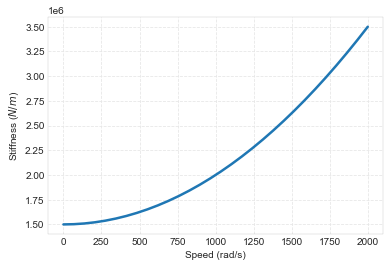

In [188]:
bearing2.kyy.plot()

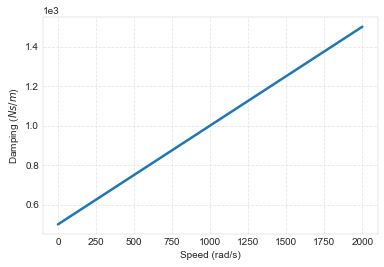

In [189]:
bearing2.cyy.plot()

## 4.2 SealElement Class <a id='section4.2'></a>

`SealElement` class method have the exactly same arguments than `BearingElement`. The differences are found in some considerations when assembbling a full rotor model. For example, a SealElement won't generate reaction forces in a static analysis. So, even they are very similar when built, they have different roles in the model.

The parameters to be inserted are:

```text
n: int
    Node which the bearing will be located in
kxx: float, array
    Direct stiffness in the x direction.
cxx: float, array
    Direct damping in the x direction.
kyy: float, array, optional
    Direct stiffness in the y direction.
    (defaults to kxx)
cyy: float, array, optional
    Direct damping in the y direction.
    (defaults to cxx)
kxy: float, array, optional
    Cross coupled stiffness in the x direction.
    (defaults to 0)
cxy: float, array, optional
    Cross coupled damping in the x direction.
    (defaults to 0)
kyx: float, array, optional
    Cross coupled stiffness in the y direction.
    (defaults to 0)
cyx: float, array, optional
    Cross coupled damping in the y direction.
    (defaults to 0)
frequency: array, optional
    Array with the speeds (rad/s).
seal_leakage: float, optional
    Amount of leakage.
tag : str, optional
    A tag to name the element
    Default is None.
scale_factor: float, optional
    The scale factor is used to scale the seal drawing.
    Default is 1
```

Let's see an example:

In [190]:
stfx = 1e6
stfy = 0.8e6
seal = rs.SealElement(n=0, kxx=stfx, kyy=stfy, cxx=1e3, cyy=0.8e3)
seal

SealElement(n=0, n_link=None,
 kxx=['1.00e+06'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['8.00e+05'],
 cxx=['1.00e+03'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['8.00e+02'],
 frequency=nan, tag=None)

## 4.3 BallBearingElement Class <a id='section4.3'></a>

This class will create a bearing element based on some geometric and constructive parameters of ball bearings. The main difference is that cross-coupling stiffness and damping are not modeled in this case.

The parameters to be inserted are:

```text
n: int
    Node which the bearing will be located in
n_balls: float
    Number of steel spheres in the bearing
d_balls: float
    Diameter of the steel sphere
fs: float,optional
    Static bearing loading force
alpha: float, optional
    Contact angle between the steel sphere and the inner / outer raceway
cxx: float, optional
    Direct stiffness in the x direction.
    Default is None
cyy: float, optional
    Direct damping in the y direction.
    Defaults is None
tag : str, optional
    A tag to name the element
    Default is None
n_link: int, optional
    Node to which the bearing will connect. If None the bearing is
    connected to ground.
    Default is None.
scale_factor: float, optional
    The scale factor is used to scale the bearing drawing.
    Default is 1.
```

Let's see an example:

In [191]:
n = 0
n_balls= 8
d_balls = 0.03
fs = 500.0
alpha = np.pi / 6
tag = "ballbearing"
ballbearing = rs.BallBearingElement(
    n=n,
    n_balls=n_balls,
    d_balls=d_balls,
    fs=fs,
    alpha=alpha,
    tag=tag,
)
ballbearing

BallBearingElement(n=0, n_link=None,
 kxx=['4.64e+07'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['1.01e+08'],
 cxx=['5.80e+02'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['1.26e+03'],
 frequency=nan, tag='ballbearing')

## 4.4 RollerBearingElement Class <a id='section4.4'></a>

This class will create a bearing element based on some geometric and constructive parameters of roller bearings. The main difference is that cross-coupling stiffness and damping are not modeled in this case.

The parameters to be inserted are:

```text
n: int
    Node which the bearing will be located in
n_rollers: float
    Number of steel spheres in the bearing.
l_rollers: float
    Length of the steel rollers.
fs: float,optional
    Static bearing loading force
alpha: float, optional
    Contact angle between the steel sphere and the inner / outer raceway
cxx: float, optional
    Direct stiffness in the x direction.
    Default is None.
cyy: float, optional
    Direct damping in the y direction.
    Defaults is None
tag : str, optional
    A tag to name the element
    Default is None
n_link: int, optional
    Node to which the bearing will connect. If None the bearing is
    connected to ground.
    Default is None.
scale_factor: float, optional
    The scale factor is used to scale the bearing drawing.
    Default is 1.
```

Let's see an example:

In [192]:
n = 0
n_rollers= 8
l_rollers = 0.03
fs = 500.0
alpha = np.pi / 6
tag = "rollerbearing"
rollerbearing = rs.RollerBearingElement(
    n=n,
    n_rollers=n_rollers,
    l_rollers=l_rollers,
    fs=fs,
    alpha=alpha,
    tag=tag
)
rollerbearing

RollerBearingElement(n=0, n_link=None,
 kxx=['2.73e+08'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['5.57e+08'],
 cxx=['3.41e+03'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['6.96e+03'],
 frequency=nan, tag='rollerbearing')

## 4.5 MagneticBearingElement Class <a id='section4.5'></a>

This class creates a magnetic bearing element. Parameters can be a constant value or speed dependent. For speed dependent parameters, each argument should be passed as an array and the correspondent speed values should also be passed as an array.

The parameters to be inserted are:

```text
n: int
    Node which the bearing will be located in
kxx: float, array
    Direct stiffness in the x direction.
cxx: float, array
    Direct damping in the x direction.
kyy: float, array, optional
    Direct stiffness in the y direction.
    (defaults to kxx)
cyy: float, array, optional
    Direct damping in the y direction.
    (defaults to cxx)
kxy: float, array, optional
    Cross coupled stiffness in the x direction.
    (defaults to 0)
cxy: float, array, optional
    Cross coupled damping in the x direction.
    (defaults to 0)
kyx: float, array, optional
    Cross coupled stiffness in the y direction.
    (defaults to 0)
cyx: float, array, optional
    Cross coupled damping in the y direction.
    (defaults to 0)
frequency: array, optional
    Array with the speeds (rad/s).
tag: str, optional
    A tag to name the element
    Default is None.
n_link: int, optional
    Node to which the bearing will connect. If None the bearing is
    connected to ground.
    Default is None.
scale_factor: float, optional
    The scale factor is used to scale the bearing drawing.
    Default is 1.
```

Let's see an example:

In [193]:
kxx = 1e3
kyy = 1e3
kxy = 1e1
kyx = 1e1
cxx = 1e3
cyy = 1e3
cxy = 1e1
cyx = 1e3
frequency = np.linspace(0, 100, 4)
mb = rs.MagneticBearingElement(
    n=0,
    kxx=kxx,kyy=kyy,kxy=kxy,kyx=kyx,
    cxx=cxx,cyy=cyy,cxy=cxy,cyx=cyx,
    frequency=frequency
)
mb

MagneticBearingElement(n=0, n_link=None,
 kxx=['1.00e+03', '1.00e+03', '1.00e+03', '1.00e+03'], kxy=['1.00e+01', '1.00e+01', '1.00e+01', '1.00e+01'],
 kyx=['1.00e+01', '1.00e+01', '1.00e+01', '1.00e+01'], kyy=['1.00e+03', '1.00e+03', '1.00e+03', '1.00e+03'],
 cxx=['1.00e+03', '1.00e+03', '1.00e+03', '1.00e+03'], cxy=['1.00e+01', '1.00e+01', '1.00e+01', '1.00e+01'],
 cyx=['1.00e+03', '1.00e+03', '1.00e+03', '1.00e+03'], cyy=['1.00e+03', '1.00e+03', '1.00e+03', '1.00e+03'],
 frequency=[  0.          33.33333333  66.66666667 100.        ], tag=None)

### 4.5.1 Creating Magnetic Bearing with electromagnetic parameters<a id='section4.5.1'></a>

There's an alternative to create Magnetic Bearing elements. You can input electromagnetic parameters and PID gains and ROSS  converts it to stiffness and damping coefficients. To do ir, use the classmethod `MagneticBearingElement.param_to_coef()`

The parameters to be inserted are:

```text
n : int
    The node in which the magnetic bearing will be located in the rotor.
g0: float
    Air gap in m^2.
i0: float
    Bias current in Ampere
ag: float
    Pole area in m^2.
nw: float or int
    Number of windings
alpha: float or int
    Pole angle in radians.
kp_pid: float or int
    Proportional gain of the PID controller.
kd_pid: float or int
    Derivative gain of the PID controller.
k_amp: float or int
    Gain of the amplifier model.
k_sense: float or int
    Gain of the sensor model.
tag: str, optional
    A tag to name the element
    Default is None.
n_link: int, optional
    Node to which the bearing will connect. If None the bearing is
    connected to ground.
    Default is None.
scale_factor: float, optional
    The scale factor is used to scale the bearing drawing.
    Default is 1.
```

Let's see an example:

In [194]:
n = 0
g0 = 1e-3
i0 = 1.0
ag = 1e-4
nw = 200
alpha = 0.392
kp_pid = 1.0
kd_pid = 1.0
k_amp = 1.0
k_sense = 1.0
tag = "magneticbearing"
mbearing = rs.MagneticBearingElement.param_to_coef(
    n=n,g0=g0,i0=i0,ag=ag,nw=nw,alpha=alpha, kp_pid=kp_pid,kd_pid=kd_pid, k_amp=k_amp, k_sense=k_sense
)
mbearing

MagneticBearingElement(n=0, n_link=None,
 kxx=['-4.64e+03'], kxy=['0.00e+00'],
 kyx=['0.00e+00'], kyy=['-4.64e+03'],
 cxx=['4.65e+00'], cxy=['0.00e+00'],
 cyx=['0.00e+00'], cyy=['4.65e+00'],
 frequency=nan, tag=None)

## 4.6 Creating bearing elements via Excel <a id='section4.6'></a>

There's an option for creating bearing elements via an Excel file. The classmethod `.from_table()` reads an Excel file created and converts it to a `BearingElement` instance. Differently from creating shaft or disk elements, this method creates only a single bearing element. To create a list of bearing elements, the user should open several spreadsheets in the Excel file and run a list comprehension loop appending each elemnet to the list.

A header with the names of the columns is required. These names should match the names expected by the routine (usually the names of the parameters, but also similar ones). The program will read every row bellow the header until they end or it reaches a NaN, which means if the code reaches to an empty line, it stops iterating.

```text
n : int
    The node in which the bearing will be located in the rotor.
file: str
    Path to the file containing the bearing parameters.
sheet_name: int or str, optional
    Position of the sheet in the file (starting from 0) or its name. If none is passed, it is
    assumed to be the first sheet in the file.
```

An example of Excel content can be found at diretory *ross/tests/data/bearing_seal_si.xls*, spreadsheet "XLUserKCM".

In [195]:
# single bearing element

file_path = Path("C:/Users/Rodrigo/Documents/bearing_seal_si.xls")
bearing = rs.BearingElement.from_table(0, file_path)
bearing

BearingElement(n=0, n_link=None,
 kxx=['1.38e+07', '3.00e+07', '5.36e+07', '8.51e+07', '1.21e+08', '1.60e+08', '1.98e+08', '2.35e+08', '2.71e+08'], kxy=['0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00'],
 kyx=['0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00'], kyy=['1.38e+07', '3.00e+07', '5.36e+07', '8.51e+07', '1.21e+08', '1.60e+08', '1.98e+08', '2.35e+08', '2.71e+08'],
 cxx=['1.03e+05', '1.27e+05', '1.45e+05', '1.54e+05', '1.55e+05', '1.51e+05', '1.45e+05', '1.42e+05', '1.41e+05'], cxy=['0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00'],
 cyx=['0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00', '0.00e+00'], cyy=['1.03e+05', '1.27e+05', '1.45e+05', '1.54e+05', '1.55e+05', '1.51e+05', '1.45e+05', '1.42e+05', '1.41e+05'],
 frequency=[ 314.15926536  418.87902048  523.598775

In [196]:
# list of bearing elements

# node = list with the bearing elements nodes number
# file_path = os.path.dirname(os.path.realpath("Documentos")) + '/bearing_seal_si.xls'
# bearings = [rs.BearingElement.from_table(n, file_path, sheet_name=i) for i, n in enumerate(node)]

## 4.7 Exercise <a id='section4.7'></a>

Use the `BearingElement` class to create 2 bearing elements. You are free to assign your own coefficient values and node position to the elements, respecting the correct sintax.

- one with **constant coefficients**;
- one with **speed dependent coefficients**.



In [197]:
########### CODE HERE ###########

# Section 5: PointMass Class <a id='section5'></a>

The `PointMass` class creates a point mass element. This element can be used to link other elements in the analysis. The mass provided can be different on the x and y direction (e.g. different support inertia for x and y directions).

`PointMass` also keeps the mass, stiffness, damping and gyroscopi matrices sizes consistence. When adding 2 bearing elements in series, it opens a new node with new degrees of freedom (DoF) (*see section 4.1.3*) and expands the stiffness and damping matrices. For this reason, it's necessary to add mass values to those DoF to match the matrices sizes.

The parameters to be inserted are:
```text
n: int
    Node which the bearing will be located in.
m: float, optional
    Mass for the element.
mx: float, optional
    Mass for the element on the x direction.
my: float, optional
    Mass for the element on the y direction.
tag: str
    A tag to name the element
```

If you input the argument `m`, the code automatically replicate the mass value for both directions "x" and "y".

Let's see an example of creating point masses:

In [198]:
# inputting m
p0 = rs.PointMass(n=0, m=2)
p0.M() # returns de mass matrices for the element

array([[2., 0.],
       [0., 2.]])

In [199]:
# inputting mx and my
p1 = rs.PointMass(n=0, mx=2, my=3)
p1.M()

array([[2., 0.],
       [0., 3.]])

## 5.1 Exercise <a id='section5.1'></a>

Add a `PointMass` to the correct node of a 2-bearing system in series. The point mass must link both elements.

- **Bearing 1**:
```
bearing1 = rs.BearingElement(n=0, kxx=1, cxx=0, n_link=1)
```
- **Bearing 2**:
```
bearing2 = rs.BearingElement(n=1, kxx=1, cxx=0)
```

In [200]:
########### CODE HERE ###########

# Section 6: Rotor Class <a id='section6'></a>

`Rotor` is the main class from ROSS. It takes as argument lists with all elements and assembles the mass, gyroscopic, damping and stiffness global matrices for the system. The object created has several methods that can be used to evaluate the dynamics of the model (they all start with the prefix `.run_`).

To use this class, you must input all the already instantiated elements in a list format, as it follows.

```text
    shaft_elements : list
        List with the shaft elements
    disk_elements : list
        List with the disk elements
    bearing_seal_elements : list
        List with the bearing elements
    point_mass_elements: list
        List with the point mass elements
    sparse : bool, optional
        If sparse, eigenvalues will be calculated with arpack.
        Default is True.
    n_eigen : int, optional
        Number of eigenvalues calculated by arpack.
        Default is 12.
    tag : str
        A tag for the rotor
```

It's important to notice the `n_eigen` parameter, which will determine how many eigenvalues will be calculated by the other functions, then how many natural frequencies and mode shapes (always half the value of `n_eigen`) will be available to retrieve.

If the shaft elements are not numbered, the class set a number for each one, according to the element's position in the list supplied to the rotor constructor.

To assemble the matrices, the `Rotor` class takes the local DoF's index from each element (element method `.dof_mapping()`) and calculate the global index

## 6.1 Creating a rotor model <a id='section6.1'></a>

Let's create a simple rotor model with $1.5 m$ length with 6 identical shaft elements, 2 disks, 2 bearings in the shaft ends and a support linked to the first bearing. First, we create the elements, then we input them to the `Rotor` class.

In [201]:
n = 6

shaft_elem = [
    rs.ShaftElement(
        L=0.25,
        idl=0.0,
        odl=0.05,
        material=steel,
        shear_effects=True,
        rotary_inertia=True,
        gyroscopic=True,
    )
    for _ in range(n)
]

disk0 = rs.DiskElement.from_geometry(
    n=2, material=steel, width=0.07, i_d=0.05, o_d=0.28
)
disk1 = rs.DiskElement.from_geometry(
    n=4, material=steel, width=0.07, i_d=0.05, o_d=0.28
)
disks = [disk0, disk1]

stfx = 1e6
stfy = 0.8e6
bearing0 = rs.BearingElement(0, kxx=stfx, kyy=stfy, cxx=0, n_link=7)
bearing1 = rs.BearingElement(6, kxx=stfx, kyy=stfy, cxx=0)
bearing2 = rs.BearingElement(7, kxx=stfx, kyy=stfy, cxx=0)

bearings = [bearing0, bearing1, bearing2]

pm0 = rs.PointMass(n=7, m=30)
pointmass = [pm0]

rotor1 = rs.Rotor(shaft_elem, disks, bearings, pointmass)

print("Rotor total mass = ", np.round(rotor1.m, 2))
print("Rotor center of gravity =", np.round(rotor1.CG, 2))

Rotor total mass =  88.18
Rotor center of gravity = 0.75


### 6.2 Creating a rotor from sections <a id='section6.2'></a>

An alternative to build rotor models is dividing the rotor in sections. Each section gets the same number of shaft elements.


The parameters to be inserted are:
```text
leng_data : list
    List with the lengths of rotor regions.
idl_data : list
    List with the inner diameters of rotor regions (Left Station).
odl_data : list
    List with the outer diameters of rotor regions (Left Station).
idr_data : list, optional
    List with the inner diameters of rotor regions (Right Station).
    Default is equal to idl_data (cylindrical element).
odr_data : list, optional
    List with the outer diameters of rotor regions (Right Station).
    Default is equal to odl_data (cylindrical element).
material_data : ross.material or list of ross.material
    Defines a single material for all sections or each section can be
    defined by a material individually.
disk_data : list, optional
    list of disk elements.
    ***See 'disk_element.py' docstring for more information***
brg_seal_data : list, optional
    List of bearing elements.
    ***See 'bearing_seal_element.py' docstring for more information***
nel_r : int, optional
    Number or elements per shaft region.
    Default is 1.
n_eigen : int, optional
    Number of eigenvalues calculated by arpack.
    Default is 12.
tag : str
    A tag for the rotor
```

There's an important difference in this class method when placing disks and bearings. The argument `n` will refer, not to the element node, but to the section node. So if your model has 3 sections with 4 elements each, there're 4 section nodes and 13 element nodes.

Let's repeat the rotor model from the last example, but using `.from_section()` class method, without the support.

In [202]:
i_d = 0
o_d = 0.05

# inner diameter of each section
i_ds_data = [0, 0, 0]
# outer diameter of each section
o_ds_data = [0.05, 0.05, 0.05]
# length of each section
leng_data = [0.5, 0.5, 0.5]

material_data = [steel, steel, steel]

stfx = 1e6
stfy = 0.8e6

# n = 0 refers to the section 0, first node
bearing0 = rs.BearingElement(n=0, kxx=stfx, kyy=stfy, cxx=1e3)

# n = 3 refers to the section 2, last node
bearing1 = rs.BearingElement(n=3, kxx=stfx, kyy=stfy, cxx=1e3)
bearings = [bearing0, bearing1]

# n = 1 refers to the section 1, first node
disk0 = rs.DiskElement.from_geometry(
    n=1,
    material=steel,
    width=0.07,
    i_d=0.05,
    o_d=0.28
)

# n = 2 refers to the section 2, first node
disk1 = rs.DiskElement.from_geometry(
    n=2,
    material=steel,
    width=0.07,
    i_d=0.05,
    o_d=0.28
)
disks = [disk0,disk1]

rotor2 = rs.Rotor.from_section(
    brg_seal_data=bearings,
    disk_data=disks,
    idl_data=i_ds_data,
    leng_data=leng_data,
    odl_data=o_ds_data, 
    nel_r=4,
    material_data=steel,
)

print("Rotor total mass = ", np.round(rotor2.m, 2))
print("Rotor center of gravity =", np.round(rotor2.CG, 2))

Rotor total mass =  88.18
Rotor center of gravity = 0.75


## 6.3 Visualizing the rotor model  <a id='section6.3'></a>

It is interesting to plot the rotor to check if the geometry checks with what you wanted to the model. Use the `.plot_rotor()` method to create a plot.

```text
nodes : int, optional
    Increment that will be used to plot nodes label.
    Default is 1
plot_type : str, optional
    Matplotlib or bokeh.
    Default is matplotlib.
```

`nodes` argument is useful when your model has lots of nodes and the visualization of nodes label may be confusing. Set an increment to the plot nodes label

ROSS has 2 main plotting libraries: **Bokeh** and **Matplotlib**. You can choose this with `plot_type='matplotlib` or `plot_type='bokeh'`. The default plot is the bokeh output.

When plotting with **Bokeh**, use the command `show` (`from bokeh.plotting import show`) to display the image. Otherwise, the code only returns the Figure object.
With the bokeh plot, you can hover the mouse icon over the shaft, disk and point mass elements to check some of their parameters. You can turn it off by clicking on the `Hover` icon on the image.

In [203]:
show(rotor1.plot_rotor(plot_type='bokeh'))

Let's visualize another rotor example with **overlapping shaft elements**:

In [204]:
shaft_file = Path("C:/Users/Rodrigo/Documents/shaft_si.xls")
shaft = rs.ShaftElement.from_table(
    shaft_file, sheet_type="Model", sheet_name="Model"
)

file_path = Path("C:/Users/Rodrigo/Documents/shaft_si.xls")
list_of_disks = rs.DiskElement.from_table(file_path, sheet_name="More")

bearing1 = rs.BearingElement(8, kxx=5e6, kyy=5e6, cxx=3e3, scale_factor=0.5)
bearing2 = rs.BearingElement(47, kxx=5e6, kyy=5e6, cxx=3e3, scale_factor=0.5)

bearings = [bearing1, bearing2]

rotor3 = rs.Rotor(shaft, list_of_disks, bearings)

In [205]:
node_increment = 5
show(rotor3.plot_rotor(nodes=node_increment))

## 6.4 Saving a rotor model  <a id='section6.4'></a>

You can save a rotor model using the method `.save()`. This method saves the each element type and the rotor object in different *.toml* files. 

You just need to input a name and the diretory, where it will be saved. If you don't input a file_path, the rotor model is saved inside the "ross" folder.

```text
rotor_name : str
    file name.
    Default is "rotor".
file_path : str
    The diretory where the model will be saved.
    Default saves inside ross folder.
```

Let's save the `rotor2`:

In [206]:
# rotor2.save(file_name="rotor2", file_path="")

## 6.5 Loading a rotor model  <a id='section6.5'></a>

You can load a rotor model using the method `.load()`. This method loads a previously saved rotor model.

You just need to input the file path to the method.

```text
file_path : str
    The path to load the rotor model.
```

Now, let's load the `rotor2` we saved before:

In [207]:
# rotor3 = rs.Rotor.load(file_path="")
# rotor3 == rotor2

## 6.6 Deleting a rotor model  <a id='section6.6'></a>

If you saved a rotor model, and now you want to delete it, use the method `.remove()`. This method will remove the rotor files from your folder.

```text
file_path : str
    The path to remove the rotor model.
```

Now, let's remove the `rotor2` we saved before:

In [208]:
# rs.Rotor.remove(file_path="")

## 6.7 Exercise <a id='section6.7'></a>

Now that you have learnt the basics from ROSS, try to create your own rotor model.

Start with the shaft elements, create the disk and bearing elements, and use `Rotor` to build your model. Plot the rotor to check if everything was correctly built.

In [209]:
########### CODE HERE ###########

# Section 7: Rotor Analyses <a id='section7'></a>

In section 6 we have learnt how to create a rotor model with `Rotor` class. Now, we'll use the same class to run the simulation. There're some methods, most of them with the prefix `run_` you can use to run the rotordynamics analyses.

For Most of the methods, ypu can use the command `.plot()` to display a graphical visualization of the results (e.g `run_campbel().plot()`, `run_freq_response().plot()`).

ROSS offers the following analyses:
- Static analysis
- Modal analysis
- Campbell Diagram
- Frequency response
- Unbalance response
- Time response
- Orbit response




## 7.1 Static Analysis <a id='section7.1'></a>

This method runs the static analysis for the rotor. It calculate the static deformation due the gravity effects (shaft and disks weight). It also returns the bending moment and shearing force on each node, and you can return a free-body-diagram representation for the rotor, with the self weight, disks weight and reaction forces on bearings displayed.

### 7.1.1 Running static analysis <a id='section7.1.1'></a>

To run the simulation, use the `.run_static()` method. You can define a variable to store the results.

Storing the results, it's possible to return the following arrays:
- `disk_forces_nodal`
- `disk_forces_tag`
- `bearing_forces_nodal`
- `bearing_forces_tag`
- `disp_y`
- `Vx`
- `Bm`



In [210]:
static = rotor3.run_static()

#### Returning forces

In [211]:
# Disk forces
# rotor3.disk_forces_nodal
# rotor3.disk_forces_tag

# Bearing forces
# rotor3.bearing_forces_nodal
# rotor3.bearing_forces_tag 

#### Other attributes

In [212]:
# Shearing force array
# rotor3.Vx

# Bending moment array
# rotor3.Bm

# Displacement in Y direction
# rotor3.disp_y

### 7.1.2 Plotting results <a id='section7.1.2'></a>

With results stored, you can use some methods to plot the results. Currently, there're four plots you can retrieve from static analysis:

- `.plot_free_body_diagram()`
- `.plot_deformation()`
- `.plot_shearing_force()`
- `.plot_bending_moment()`

All the plot methods return figures created by Bokeh library. So, always use the command `show()` to show them.

#### Plotting free-body-diagram

In [213]:
show(static.plot_free_body_diagram())

#### Plotting deformation

In [214]:
show(static.plot_deformation())

#### Plotting shearing force diagram

In [215]:
show(static.plot_shearing_force())

#### Plotting bending moment diagram

In [216]:
show(static.plot_bending_moment())

## 7.2 Modal Analysis <a id='section7.2'></a>

ROSS performs the modal analysis through method `run_modal()`.
This method calculates natural frequencies, damping ratios and mode shapes.

You must select a speed, which will be used as excitation frequency to calculate the system's eigenvalues and eigenvectors. 
```text
speed : float
    Speed at which the eigenvalues and eigenvectors will be calculated.
```

After running the modal analysis, it's possible to return the following attributes:
- eigenvalues (evalues);
- eigenvectors (evectors);
- damped natural frequencies (wd);
- undamped natural frequencies (wn);
- damping ratio (damping_ratio);
- logarithmic decrement (log_dec).


### 7.2.1 Running modal analysis <a id='section7.2.1'></a>

To run the modal analysis, choose a speed to instantiate the method. For different speeds, change the the argument and run `run_modal()` once again.

#### Returning undamped natural frequencies

In [217]:
rotor_speed = 100.0 # rad/s
modal = rotor3.run_modal(rotor_speed)
print(f"Undamped natural frequencies:\n {modal.wn}")

Undamped natural frequencies:
 [198.9146681  198.91950682 253.63327332 255.66672873 978.79007322
 984.72955081]


#### Returning damped natural frequencies

In [218]:
# modal.wd
print(f"Damped natural frequencies:\n {modal.wd}")

Damped natural frequencies:
 [198.5771907  198.58195641 252.89952093 254.92693828 978.77462685
 984.71401925]


#### Returning the damping ratio

In [219]:
# modal.damping_ratio
print(f"Damping ratio for each mode:\n {modal.damping_ratio}")

Damping ratio for each mode:
 [0.05822636 0.05823195 0.07601028 0.07601825 0.005618   0.00561646]


#### Returning logarithmic decrement 

In [220]:
# modal.log_dec
print(f"Logarithmic decrement for each mode:\n {modal.log_dec}")

Logarithmic decrement for each mode:
 [0.36646878 0.36650404 0.47897231 0.47902283 0.03529949 0.03528978]


### 7.2.2 Plotting results <a id='section7.2.2'></a>

Once `run_modal()` is completed, you can check for the rotor's mode shapes. You can plot each one of the modes calculated.

Besides, there're two options for visualization:
- `plot_mode2D` - plotting 2D view
- `plot_mode3D` - plotting 3D view

#### Plotting 3D view

Use the command `.plot_mode3D()`. The parameters to be inserted are:
```text
mode : int
    The n'th vibration mode
    Default is None
evec : array, optional
    Array containing the system eigenvectors
```

Note that the argument `evec` should only be given if the user has a different array for the eigenvectors (than the ones generated by the current analysis) and wants to plot it.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1b5ecaa8cc8>)

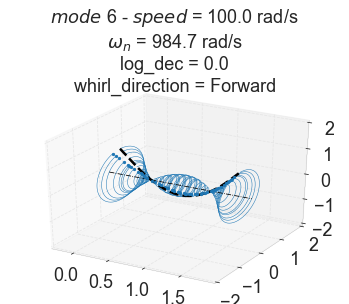

In [221]:
mode = 5
modal.plot_mode3D(mode)

#### Plotting 2D view

Use the command `.plot_mode2D()`. The parameters to be inserted are:
```text
mode : int
    The n'th vibration mode
    Default is None
evec : array, optional
    Array containing the system eigenvectors
```

Note that the argument `evec` should only be given if the user has a different array for the eigenvectors (than the ones generated by the current analysis) and wants to plot it.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b5eee8e848>)

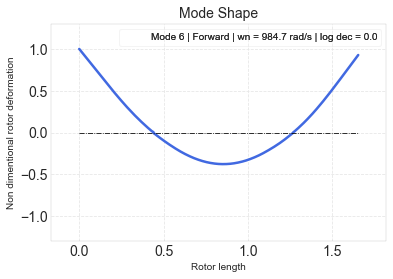

In [222]:
mode = 5
modal.plot_mode2D(mode)

## 7.3 Campbell Diagram <a id='section7.3'></a>

Also called "whirl speed map" in rotordynamics, ROSS calculate and plots the modes’ damped eigenvalues and the logarithmic decrement as a function of rotor speed. 

To run the Campbell Diagram, use the command `.run_campbell()`. The user must input an array of speeds, which will be iterated to calculate each point on the graph.
```text
    speed_range : array
        Array with the speed range in rad/s.
    frequencies : int, optional
        Number of frequencies that will be calculated.
        Default is 6.
```

This method returns the damped natural frequencies, logarithmic decrement and the whirl values (values indicating the whirl direction: backward or forward).

### 7.3.1 Running campbell diagram <a id='section7.3.1'></a>

In this example the whirl speed map is calculated for a speed range from 0 to 1000 rad/s (~9550 RPM).

Storing the results, it's possible to return the following arrays:
- `wd`
- `log_dec`
- `whirl_values`

Each value in these arrays is calculated for each speed value in `speed_range`

In [223]:
samples = 31
speed_range = np.linspace(0, 1000, samples)

campbell = rotor3.run_campbell(speed_range)

In [224]:
# results for each frequency
frequency_index = 0
print(campbell.wd[:, frequency_index])

[198.57958065 198.5787856  198.57798895 198.5771907  198.57639081
 198.57558927 198.57478606 198.57398116 198.57317456 198.57236623
 198.57155615 198.57074431 198.56993067 198.56911522 198.56829794
 198.5674788  198.56665778 198.56583485 198.56501    198.56418319
 198.5633544  198.56252361 198.56169078 198.56085589 198.56001891
 198.55917982 198.55833858 198.55749516 198.55664954 198.55580167
 198.55495154]


In [225]:
# results for each frequency
frequency_index = 1
print(campbell.log_dec[:, frequency_index])

[0.36648644 0.36649232 0.36649818 0.36650404 0.3665099  0.36651574
 0.36652158 0.36652741 0.36653324 0.36653906 0.36654487 0.36655068
 0.36655647 0.36656226 0.36656805 0.36657383 0.3665796  0.36658536
 0.36659112 0.36659686 0.36660261 0.36660834 0.36661407 0.36661979
 0.36662551 0.36663122 0.36663692 0.36664261 0.3666483  0.36665398
 0.36665966]


### 7.3.2 Plotting results <a id='section7.3.2'></a>

Now that the results are stored, use `.plot()` method to display the Campbell Diagram plot.

```text
args : optional
    harmonics : list, optional
        List with the harmonics to be plotted.
        The default is to plot 1x.
plot_type : str, optional
    Matplotlib or bokeh.
    The default is bokeh
kwargs : optional
    Additional key word arguments can be passed to change
    the plot (e.g. linestyle='--')
```

For the Campbell Diagram, you can plot more than one harmonic. As default, the plot display only the 1x speed option. 
Input a list with more harmonics to display it at the graph.

In [226]:
show(campbell.plot(harmonics=[0.5, 1], plot_type="bokeh"))

## 7.4 Frequency Response <a id='section7.4'></a>

ROSS' method to calculate the Frequency Response Function is `run_freq_response()`. This method returns the magnitude and phase in the frequency domain. The response is calculated for each node from the rotor model.

When plotting the results, you can choose to plot the **amplitude vs frequency**, **phase vs frequency** or **both** (Bode plot).

The parameters to be inserted are:
```text
    speed_range : array, optional
        Array with the desired range of frequencies (the default
         is 0 to 1.5 x highest damped natural frequency.
    modes : list, optional
        Modes that will be used to calculate the frequency response
        (all modes will be used if a list is not given).
```

### 7.4.1 Running frequency response <a id='section7.4.1'></a>

To run the this analysis, use the command `run_freq_response()`. You can give a specific `speed_range` or let the program run with the default options. In this case, no arguments are needed to input.

In [227]:
samples = 51
speed_range = np.linspace(0, 1000, samples) # rads/s
results1 = rotor3.run_freq_response(speed_range=speed_range)

### 7.4.2 Plotting results <a id='section7.4.2'></a>

We can plot the frequency response of selecting the input and output degree of freedom.

The parameters to be inserted in the `plot()` methods are:
```text
inp : int
    Input.
out : int
    Output.
args : optional
    Additional bokeh plot axes or matplolib.axes
plot_type: str
    Matplotlib or bokeh.
    The default is bokeh
```

- Input is the degree of freedom to be excited;
- Output is the degree of freedom to be observed.

Each shaft node has 4 local degrees of freedom (dof) $[x, y, \alpha, \beta]$, and each degree of freedom has it own index:
- $x$ -> index 0
- $y$ -> index 1
- $\alpha$ -> index 2
- $\beta$ -> index 3

To select a DoF to input and a DoF to the output, we have to use the following correlation:

$global\_dof = dof\_per\_node \cdot  node\_number + dof\_index$

For example:
node 26, local dof $y$:

$DoF = 26 \cdot 4 + 1 = 105$

In [228]:
plot = results1.plot(inp=105, out=105)
print(plot)
show(plot)

#converting to log scale
from bokeh.models import LogScale
#plot = results1.plot_magnitude_bokeh(inp=105, out=105)
#plot.y_scale=LogScale()b
#show(plot)

Column(id='130965', ...)


## 7.5 Unbalance response <a id='section7.5'></a>


ROSS' method to simulate the reponse to an unbalance is `unbalance_response()`. This method returns the unbalanced response in the frequency domain for a given magnitide and phase of the unbalance, the node where it's applied and a frequency range.

The program takes the magnitude and phase and converts to a complex force array applied to the given node:

$$
force = \left(\begin{array}{cc} 
F \cdot e^{j\delta}\\
-jF \cdot e^{j\delta}\\
0\\
0
\end{array}\right)
$$ 

where:
- $F$ is the unbalance magnitude;
- $\delta$ is the unbalance phase;
- $j$ is the complex number notation;

When plotting the results, you can choose to plot the **amplitude vs frequency**, **phase vs frequency** or **both**.

The parameters to be inserted are:

```text
    node : list, int
        Node where the unbalance is applied.
    magnitude : list, float
        Unbalance magnitude (kg.m)
    phase : list, float
        Unbalance phase (rad)
    frequency_range : list, float
        Array with the desired range of frequencies
```


### 7.5.1 Running unbalance response <a id='section7.5.1'></a>

To run the Unbalance Response, use the command `.unbalance_response()`

In this following example, we can obtain the response for a given unbalance and its respective phase in a selected node. Notice that it's possible to add multiple unbalances instantiating node, magnitude and phase as lists.

The method returns the force response array (complex values), the displacement magnitude (absolute value of the forced response) and the phase of the forced response.

Let's run an example with 2 unbalances in phase, trying to excite the first and the third natural vibration mode.
```text
Unbalance1: node = 29
            magnitude = 0.03
            phase = 0
Unbalance2: node = 33
            magnitude = 0.02
            phase = 0
```

In [229]:
n1 = 29
m1 = 0.03
p1 = 0

n2 = 33
m2 = 0.02
p2 = 0

frequency_range=np.linspace(0, 1200, 101)
results2 = rotor3.unbalance_response([n1, n2], [m1, m2], [p1, p2], frequency_range)

### 7.5.2 Plotting results <a id='section7.5.2'></a>

To plot the figure, use the command `.plot(dof)`

Where `dof` is the degree of freedom for which you want to plot the response, which follows the same logic applied to Frequency Response.

In [230]:
show(results2.plot(dof=57, plot_type="bokeh"))

## 7.6 Time response <a id='section7.6'></a>

ROSS' method to calculate displacements due a force in time domain is `run_time_response()`. This function will take a rotor object and plot its time response given a force and a time array.

The force input must be a matrix $M \times N$, where:
- $M$ is the size of the time array;
- $N$ is the rotor's number of DoFs (you can access this value via attribute `.ndof`).

Each row from the matrix represents a node, and each column represents a time step.

This function takes the following parameters:
```text
    speed : float
        Rotor speed.
    F : array
        Force array (needs to have the same number of rows as time array and the number of columns as dof's).
        Each column corresponds to a dof and each row to a time.
    t : array
        Time array.
    dof : int
        Degree of freedom that will be observed.
```

### 7.6.1 Running time response <a id='section7.6.1'></a>

To run the Time Response, use the command `.run_time_response()`.

Building the force matrix is not trivial. We recommend creating a matrix of zeros using *numpy.zeros()* and then, adding terms to the matrix. 

In this examples, let's create an harmonic force on node 26, in $x$ and $y$ directions (remember index notation from Frequency Response (section 7.4.2). We'll plot results from 0 to 10 seconds of simulation.

In [231]:
speed = 200.0
time_samples = 1000
node = 26
t = np.linspace(0, 16, time_samples)

F = np.zeros((time_samples, rotor3.ndof))

# component on direction x
F[:, 4 * node] = 10 * np.cos(2 * t)
# component on direction y
F[:, 4 * node + 1] = 10 * np.sin(2 * t)

dof = 4 * 26 + 1
response3 = rotor3.run_time_response(speed, F, t, dof)

### 7.6.2 Plotting results <a id='section7.6.2'></a>

To plot the figure, use the command `.plot()`

In [232]:
plot = response3.plot(plot_type="bokeh")
show(plot)

## 7.7 Orbit Response <a id='section7.7'></a>

ROSS' method to calculate nodal orbits due a force in time domain `run_orbit_response()`. This function will take a rotor object and plot its time response given a force and a time array.

The force input must be a matrix $M \times N$, where:
- $M$ is the size of the time array;
- $N$ is the rotor's number of DoFs (you can access this value via attribute `.ndof`).

Each row from the matrix represents a node, and each column represents a time step.

There're two options for plotting orbits:
- a single node - 2D plot uses bokeh.
- all nodes - 3D plot uses matplotlib.

This function takes the following parameters:
```text
    speed: float
        Rotor speed
    F: array
        Force array (needs to have the same number of rows as time array).
        Each column corresponds to a dof and each row to a time.
    t: array
        Time array.
```

### 7.7.1 Running orbit response <a id='section7.7.1'></a>

To run the Orbit Response, use the command `.run_orbit_response()`.

In this example, let's input the same arguments than section 7.6.1.

In [233]:
response4 = rotor3.run_orbit_response(speed, F, t)

### 7.7.2 Plotting results <a id='section7.7.2'></a>

To plot the figure, use the command `.plot()`
```text
plot_type: str
    3d or 2d.
    Choose between plotting orbit for all nodes (3d plot) and
    plotting orbit for a single node (2d plot).
    Default is 3d.
node: int, optional
    Selected node to plot orbit.
    Fill this attribute only when selection plot_type = "2d".
    Detault is None
kwargs : optional
    Additional key word arguments can be passed to change
    the plot (e.g. linestyle='--')
```

To plot 2D, choose `plot_type="2d"` and a node.

To plot 3D, choose `plot_type="3d"`.

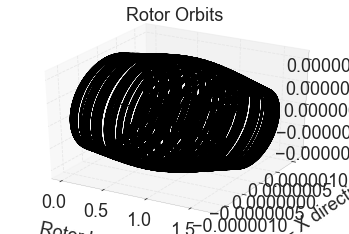

In [234]:
# plotting 3D
response4.plot()

In [235]:
# plotting 2D
node = 29
show(response4.plot(plot_type="2d", node=node))